In [5]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

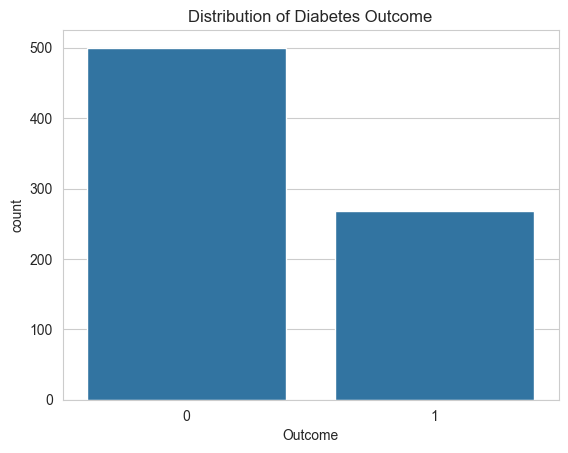

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style of the plots. 'seaborn-v0_8-whitegrid' is a clean and readable style.
sns.set_style('whitegrid')

# Create a count plot for the 'Outcome' column.
# - data=df: Specifies the DataFrame to use.
# - x='Outcome': Specifies the column to plot on the x-axis.
# Seaborn automatically counts the values in this column and creates a bar for each unique value.
ax = sns.countplot(x='Outcome', data=df)

# Add a title to the plot for better context.
ax.set_title('Distribution of Diabetes Outcome')

# Display the plot. This command ensures that only the plot is shown in the output.
plt.show()

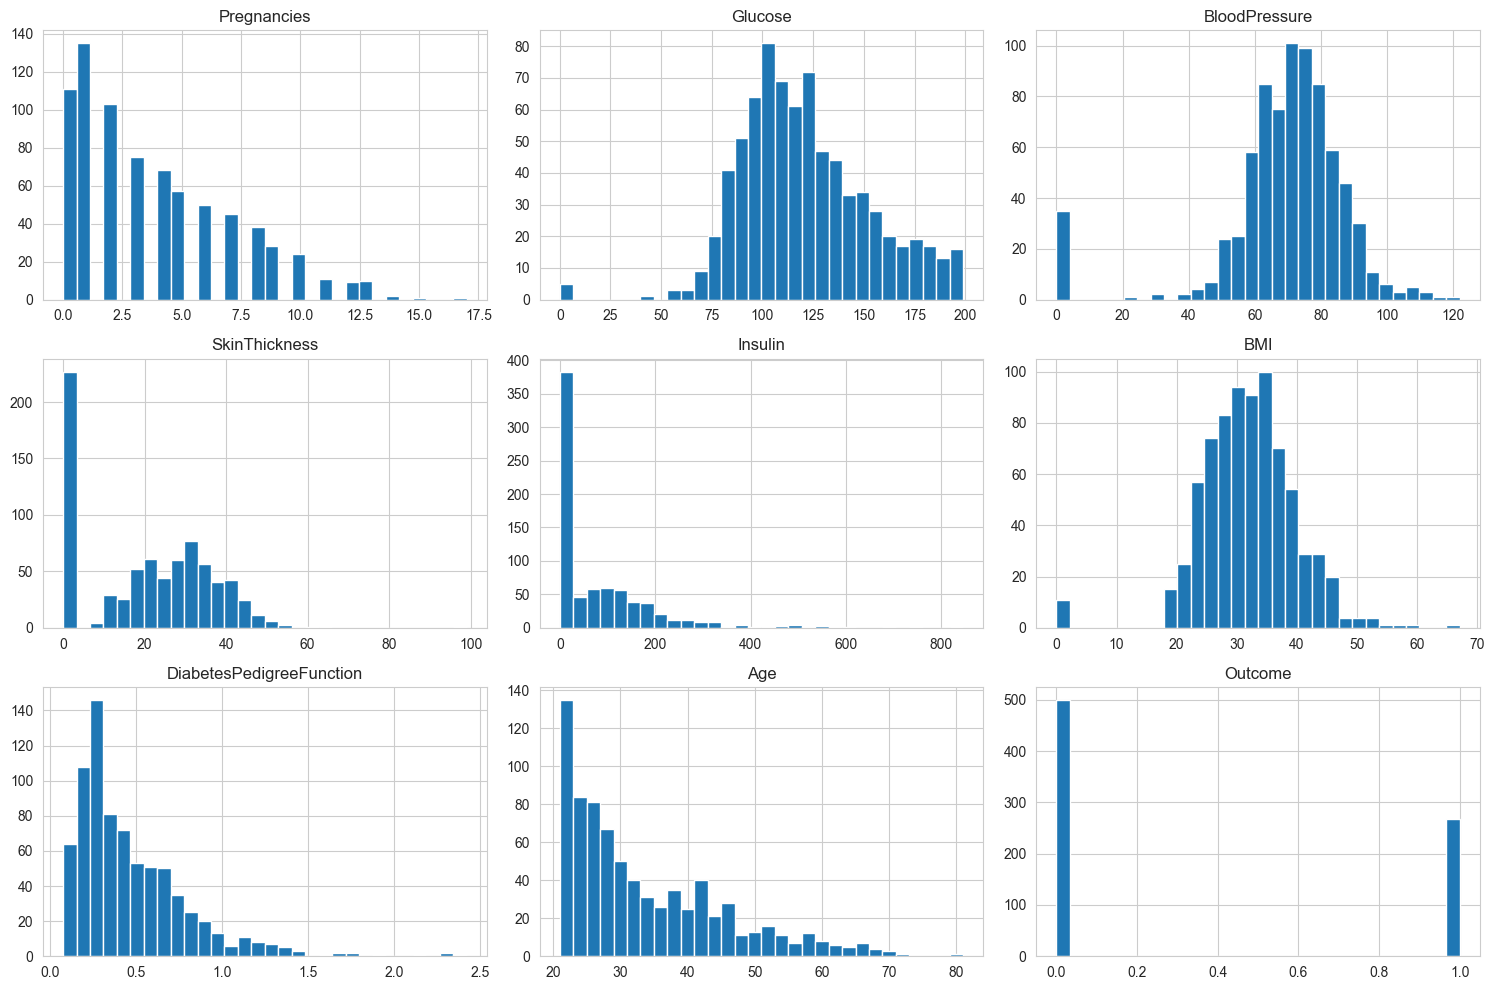

In [11]:
df.hist(figsize=(15, 10), bins=30, layout=(3, 3))

# plt.tight_layout() is a handy function that automatically adjusts subplot params so that subplots are nicely fit in the figure.
# This prevents labels from one plot overlapping with another.
plt.tight_layout()

# Display the plots
plt.show()

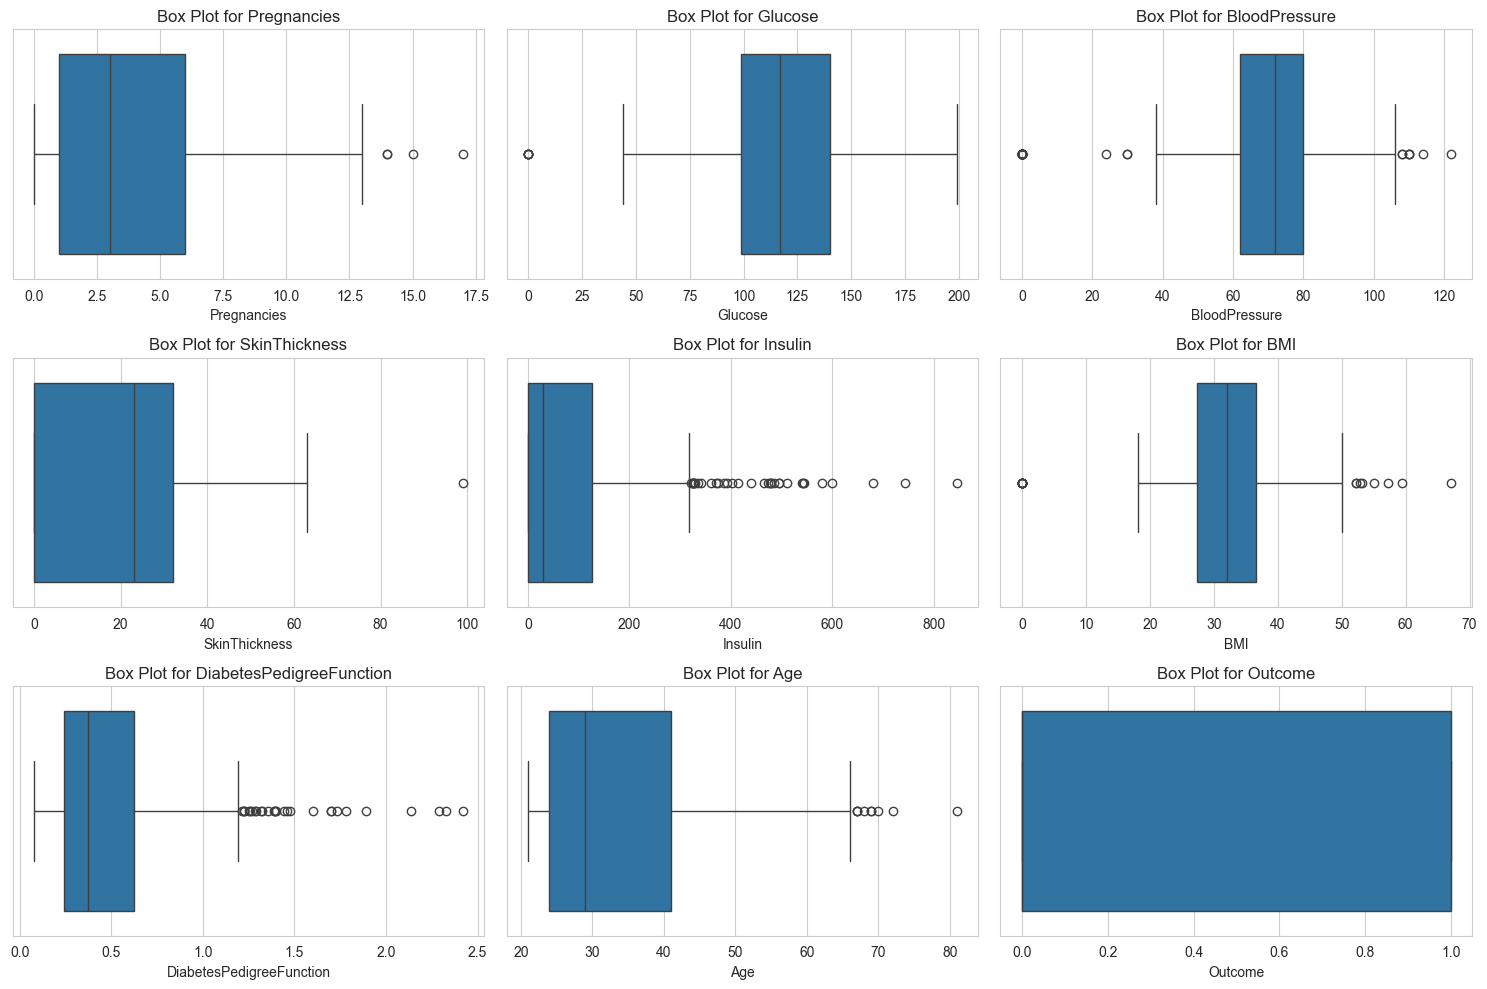

In [12]:
# We will create a grid of box plots to visualize the distribution and outliers for each feature.
# We create a figure and a set of subplots. `subplots()` returns a Figure object and an array of Axes objects.
# We specify a 3x3 grid and a larger figure size for better readability.
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# We use the flatten() method on the axes array to make it a 1D array, which is easier to loop over.
# We then loop through both the flattened axes and our DataFrame's columns simultaneously using zip().
for ax, col in zip(axes.flatten(), df.columns):
    # For each column, we create a box plot on its corresponding subplot (ax).
    # - data=df: The DataFrame containing our data.
    # - x=col: The column we want to plot.
    sns.boxplot(x=col, data=df, ax=ax)
    
    # We set a title for each subplot to know which feature it represents.
    ax.set_title(f'Box Plot for {col}')

# plt.tight_layout() adjusts the padding between and around subplots to prevent labels from overlapping.
plt.tight_layout()

# Display the entire grid of plots.
plt.show()

In [13]:
# The .corr() method calculates the pairwise correlation of all columns in the DataFrame.
# By default, it uses the Pearson correlation coefficient, which measures the linear relationship between two datasets.
# We store the resulting matrix in a new variable for clarity, though it's not strictly necessary.
correlation_matrix = df.corr()

# Display the resulting correlation matrix.
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


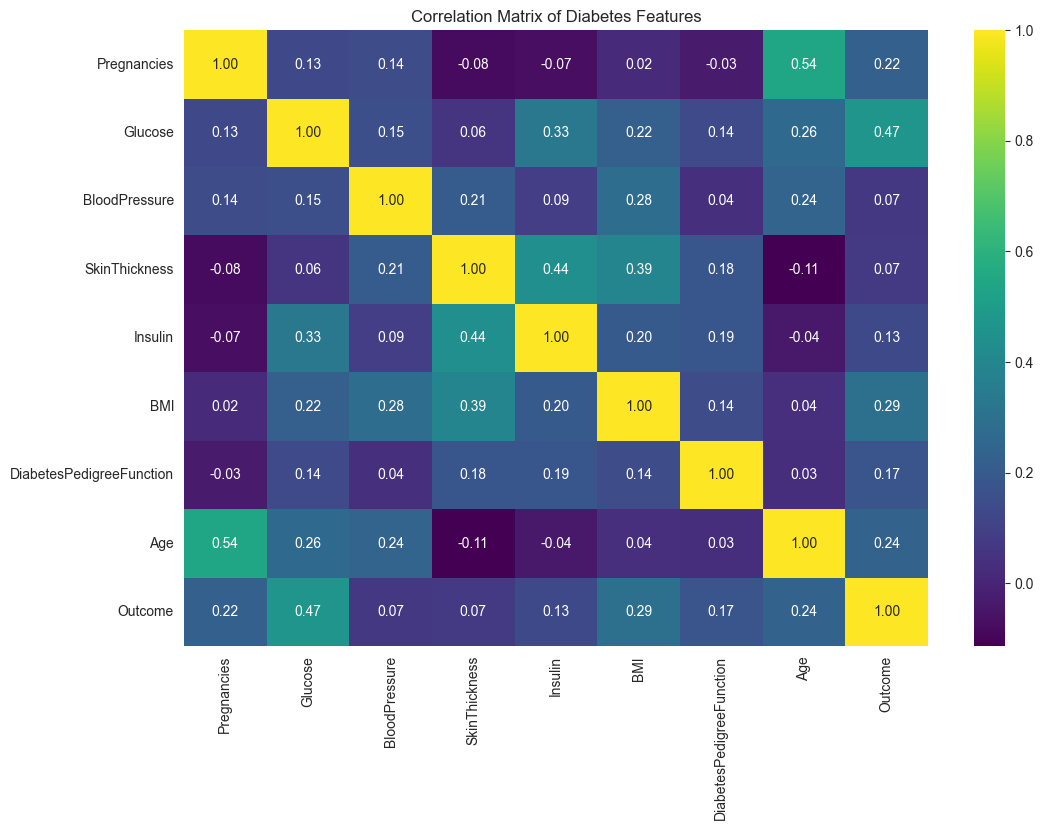

In [14]:
plt.figure(figsize=(12, 8))

# sns.heatmap() is the function we use to create the plot.
# - correlation_matrix: This is the data we're plotting.
# - annot=True: This is a crucial argument. It tells Seaborn to write the data value in each cell.
#   This gives us the best of both worlds: the easy visual interpretation of colors and the precise numerical value.
# - cmap='viridis': This sets the color map for the plot. 'viridis' is a popular choice because it's
#   visually appealing, performs well for people with color vision deficiencies, and prints well in grayscale.
# - fmt='.2f': This formats the annotations (the numbers in the cells) to two decimal places, which is clean and readable.
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')

# Add a title for context.
plt.title('Correlation Matrix of Diabetes Features')

# Display the plot.
plt.show()

In [15]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# We can print the first few rows of just these columns to re-confirm the presence of 0s.
# Notice the 0s in 'SkinThickness' and 'Insulin' in row 2, and 'BloodPressure' in row 7 (if you view more rows).
print("A peek at the data in the identified columns:")
df[columns_with_zeros].head()

A peek at the data in the identified columns:


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


In [16]:
# First, we need to import the NumPy library to get access to its 'nan' object.
# The standard convention is to import numpy as np.
import numpy as np

# Now, we select our target columns and use the .replace() method.
# df[columns_with_zeros] on the right side creates a temporary view of our DataFrame with only the columns to be cleaned.
# .replace(0, np.nan) finds every instance of the integer 0 in this view and replaces it with NumPy's Not-a-Number object.
# Finally, we assign this modified data back to the same columns in our original DataFrame, overwriting the old values.
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

# Let's check the first few rows again to see the result of our operation.
# Look at row index 2 and 4. Where there used to be 0s for 'SkinThickness' and 'Insulin', you should now see 'NaN'.
print("Data after replacing 0s with NaN:")
df.head()

Data after replacing 0s with NaN:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
# The .isnull() method returns a DataFrame of booleans (True for NaN values, False otherwise).
# Chaining .sum() on this boolean DataFrame then counts the number of True values in each column,
# which gives us the total count of missing values per feature. This is a very common pandas idiom.
missing_values_count = df.isnull().sum()

# Print the resulting Series to see the counts.
print("Count of missing values in each column after cleaning:")
print(missing_values_count)

Count of missing values in each column after cleaning:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [18]:
# Import the SimpleImputer class from Scikit-learn's impute module
from sklearn.impute import SimpleImputer

# 1. Initialize the SimpleImputer
# We specify strategy='median' based on the decision from our previous analysis.
# This tells the imputer that for each column, it should learn and use the median to fill missing values.
imputer = SimpleImputer(strategy='median')

# 2. Fit the imputer and transform the DataFrame
# The imputer.fit_transform() method first calculates the median of each column (the 'fit' part)
# and then replaces all NaN values with those learned medians (the 'transform' part).
# NOTE: The output of a Scikit-learn transformer is a NumPy array, not a pandas DataFrame.
# This means we lose our column headers and index.
imputed_data_array = imputer.fit_transform(df)

# 3. Convert the NumPy array back to a pandas DataFrame
# We must reconstruct the DataFrame, explicitly providing the original column names.
# This is a common pattern when working with Scikit-learn transformers.
df_imputed = pd.DataFrame(imputed_data_array, columns=df.columns)

# 4. Verify that the imputation was successful
# Let's run .isnull().sum() again. The output should now show zero missing values everywhere.
print("Missing values after imputation:")
print(df_imputed.isnull().sum())

# 5. Let's look at the head of our newly imputed DataFrame to see the filled values.
# Compare this to the previous df.head() output where you saw 'NaN'.
# For example, in row 2, 'SkinThickness' and 'Insulin' will now have numerical values (the medians).
print("\nData after imputation:")
print(df_imputed.head())

# 6. IMPORTANT: Update our main 'df' variable
# To ensure the next steps use our clean data, we'll replace the old DataFrame with our new, imputed one.
df = df_imputed

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data after imputation:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    125.0  33.6   
1          1.0     85.0           66.0           29.0    125.0  26.6   
2          8.0    183.0           64.0           29.0    125.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4 

In [19]:
# The features (X) are all the columns from our DataFrame EXCEPT for the 'Outcome' column.
# The .drop() method is the perfect tool for this.
# - 'Outcome': The name of the column we want to remove.
# - axis=1: This is a crucial parameter. It tells pandas that we are dropping a COLUMN.
#   If we used axis=0, pandas would try to drop a row with the index label 'Outcome', which doesn't exist.
X = df.drop('Outcome', axis=1)

# The target (y) is simply the 'Outcome' column itself.
# We can select it directly using standard pandas column selection.
y = df['Outcome']

# ---- Verification ----
# It's always good practice to check the results of our operations.

# 1. Check the first few rows of our new features matrix, X.
# Notice that it contains all the original columns except for 'Outcome'.
print("First 5 rows of our features (X):")
print(X.head())

# 2. Check the first few rows of our new target vector, y.
# Notice it's a pandas Series containing only the values from the 'Outcome' column.
print("\nFirst 5 rows of our target (y):")
print(y.head())

# 3. Check the shapes of our new variables.
# This confirms X has 768 rows and 8 columns, while y is a vector of 768 values.
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

First 5 rows of our features (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    125.0  33.6   
1          1.0     85.0           66.0           29.0    125.0  26.6   
2          8.0    183.0           64.0           29.0    125.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  31.0  
2                     0.672  32.0  
3                     0.167  21.0  
4                     2.288  33.0  

First 5 rows of our target (y):
0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

Shape of X: (768, 8)
Shape of y: (768,)


In [20]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Perform the split. This single line of code creates four new datasets.
# X: The features we want to split.
# y: The target labels we want to split.
# test_size=0.2: This specifies that we want to allocate 20% of the data to the testing set.
#                Consequently, the training set will contain the remaining 80%.
# random_state=42: This is a crucial parameter for reproducibility. It seeds the random number generator
#                  used to shuffle the data before splitting. By setting a specific number (42 is a common convention),
#                  we ensure that every time we run this code, the data is split in the exact same way.
#                  This is essential for getting consistent results during experimentation.
# stratify=y: This is another critical parameter for our specific project. During our EDA, we found that
#             our 'Outcome' classes are imbalanced. `stratify=y` ensures that the proportion of 0s and 1s in the
#             'Outcome' column is the same in both the training set and the testing set as it is in the original
#             dataset. This prevents a scenario where, by random chance, one set gets a disproportionately
#             high number of diabetic or non-diabetic examples, which would bias our training and evaluation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Verification ---
# It's always a good practice to verify the shapes of our new datasets to ensure the split was successful.
print("Shape of original X:", X.shape)
print("Shape of original y:", y.shape)
print("-" * 30)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("-" * 30)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of original X: (768, 8)
Shape of original y: (768,)
------------------------------
Shape of X_train: (614, 8)
Shape of y_train: (614,)
------------------------------
Shape of X_test: (154, 8)
Shape of y_test: (154,)


In [21]:
# Import the StandardScaler class from Scikit-learn's preprocessing module.
# This module contains many useful tools for cleaning and preparing data.
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class.
# At this point, the scaler is an empty object; it hasn't learned anything about our data yet.
# It is simply a tool that is now ready to be fitted to our training data in the next step.
scaler = StandardScaler()

# You can print the scaler object to see that it has been created successfully.
print("StandardScaler object created successfully:")
print(scaler)

StandardScaler object created successfully:
StandardScaler()


In [22]:
# The .fit() method calculates the mean and standard deviation for each feature in X_train.
# It then stores these learned parameters (mean_ and scale_) within the 'scaler' object.
# This step does NOT transform the data; it only prepares the scaler.
# We are fitting ONLY on the training data, which is a critical best practice to avoid data leakage.
scaler.fit(X_train)

# --- Verification ---
# After fitting, the scaler object now contains the learned parameters. We can inspect them.
# The `scaler.mean_` attribute holds an array of the mean values for each of the 8 features.
print("Learned Mean values for each feature (from X_train):")
print(scaler.mean_)

# The `scaler.scale_` attribute holds an array of the standard deviation values for each feature.
print("\nLearned Standard Deviation values for each feature (from X_train):")
print(scaler.scale_)

Learned Mean values for each feature (from X_train):
[  3.81921824 121.67100977  72.14006515  29.04234528 137.70521173
  32.44674267   0.47742834  33.36644951]

Learned Standard Deviation values for each feature (from X_train):
[ 3.31144822 29.97935076 12.26511926  8.88461128 78.70059997  6.81858312
  0.33003119 11.8237979 ]


In [23]:
# The .transform() method applies the learned scaling (mean and std dev from X_train) to the data provided.

# 1. Transform the training data
# The scaler uses the means and standard deviations it learned from X_train to scale X_train.
X_train_scaled = scaler.transform(X_train)

# 2. Transform the testing data
# CRUCIALLY, we use the same scaler (fitted on X_train) to transform X_test.
# This ensures the test set is scaled according to the same rules as the training set.
X_test_scaled = scaler.transform(X_test)

# --- Verification ---
# The output of the transform method is a NumPy array. Let's convert it back to a pandas DataFrame
# so we can easily inspect it and verify the results. We pass the original column names.
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Let's look at the first few rows of our newly scaled training data.
# Notice how the values are now both positive and negative, centered around zero.
print("First 5 rows of scaled training data (X_train_scaled):")
print(X_train_scaled.head())

# The definitive proof of successful standardization is to check the new mean and standard deviation.
# We'll use .describe() on our scaled training data.
print("\nStatistical summary of scaled training data:")
print(X_train_scaled.describe())

First 5 rows of scaled training data (X_train_scaled):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.851355 -1.056427      -0.826740      -1.918187 -1.203361 -0.769477   
1     0.356576  0.144399       0.477772      -0.229874 -1.470195 -0.417498   
2    -0.549372 -0.556083      -1.152868       1.233330 -0.555335  0.359790   
3    -0.851355  0.811525      -1.315932      -0.004766 -0.161437 -0.402832   
4    -1.153338 -0.889646      -0.663676       1.120776 -0.415565  1.782373   

   DiabetesPedigreeFunction       Age  
0                  0.310794 -0.792169  
1                 -0.116439  0.561034  
2                 -0.764862 -0.707594  
3                  0.262314 -0.369293  
4                 -0.337630 -0.961320  

Statistical summary of scaled training data:
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  6.140000e+02  6.140000e+02   6.140000e+02   6.140000e+02  6.140000e+02   
mean  -6.943414e-17 -1.09937

In [24]:
# We are importing the LogisticRegression class from Scikit-learn's linear_model module.
# - sklearn: The top-level library for machine learning in Python.
# - linear_model: The specific module containing models based on a linear combination of features.
# - LogisticRegression: The specific class that acts as a blueprint for creating our model object.
from sklearn.linear_model import LogisticRegression

# Print a confirmation message to ensure the import was successful.
print("LogisticRegression class imported successfully.")

LogisticRegression class imported successfully.


In [25]:
# Create an instance of the LogisticRegression class.
# We are assigning this new object to a variable, `log_reg`.
# By not specifying any other parameters, we are accepting the sensible defaults provided by Scikit-learn.
# We set `random_state=42` to ensure that our results are reproducible every time we run the code.
log_reg = LogisticRegression(random_state=42)

# Now, let's print the object. This will show us that it has been created and will display
# all the default hyperparameters it has been configured with (e.g., C=1.0, penalty='l2', etc.).
print("Logistic Regression model initialized successfully:")
print(log_reg)

Logistic Regression model initialized successfully:
LogisticRegression(random_state=42)


In [26]:
# The .fit() method is the core of model training in Scikit-learn.
# It takes the training features (X) and the training target (y) as input.
# - X_train_scaled: Our preprocessed, scaled training data. This is the "what to learn from".
# - y_train: Our corresponding training labels. This is the "what to predict".
# The model will learn the relationship between these two datasets.
# The .fit() method modifies the `log_reg` object in-place, filling it with the learned parameters (coefficients).
log_reg.fit(X_train_scaled, y_train)

# After training, we can print the model object again.
# It will look the same as before, but it is now a "fitted" estimator. It has learned the patterns from the data.
print("Logistic Regression model has been successfully trained (fitted).")
print(log_reg)

Logistic Regression model has been successfully trained (fitted).
LogisticRegression(random_state=42)


In [27]:
# We are importing the KNeighborsClassifier class from Scikit-learn's neighbors module.
# - sklearn: The top-level library.
# - neighbors: The module containing algorithms that make predictions based on the proximity of data points.
# - KNeighborsClassifier: The specific class that provides the blueprint for our k-NN model.
from sklearn.neighbors import KNeighborsClassifier

# Print a confirmation message to ensure the import was successful.
print("KNeighborsClassifier class imported successfully.")

KNeighborsClassifier class imported successfully.


In [28]:
# Create an instance of the KNeighborsClassifier class.
# The most important hyperparameter is `n_neighbors`, which is the 'k' in k-NN.
# We are setting it to 5, which is a common and effective starting value.
# This means for any new prediction, the model will find the 5 closest points in the training data and take a majority vote.
knn = KNeighborsClassifier(n_neighbors=5)

# Let's print the object to see that it has been created successfully.
# This will display all the default hyperparameters it has been configured with.
print("K-Nearest Neighbors model initialized successfully:")
print(knn)

K-Nearest Neighbors model initialized successfully:
KNeighborsClassifier()


In [29]:
# The .fit() method for k-NN is its "training" step.
# For this algorithm, it doesn't learn complex parameters like Logistic Regression does.
# Instead, it simply loads the entire training dataset (both features and labels) into memory.
# This memorized data will be used later to find the nearest neighbors for new data points.
knn.fit(X_train_scaled, y_train)

# After fitting, we can print the model object again to confirm the process is complete.
# The object is now a "fitted" estimator, ready to make predictions.
print("K-Nearest Neighbors model has been successfully trained (fitted).")
print(knn)

K-Nearest Neighbors model has been successfully trained (fitted).
KNeighborsClassifier()


In [30]:
# The .predict() method uses the trained model to make predictions on new, unseen data.
# We pass it our scaled test features (X_test_scaled).
# The model has never seen this data before, so this is an honest test of its performance.
# The output will be a NumPy array containing the model's predicted class (0 or 1) for each patient in the test set.
y_pred_log_reg = log_reg.predict(X_test_scaled)

# --- Verification ---
# It's always a good practice to inspect the output of our operations.

# 1. Let's look at the first 20 predictions our model made.
# This array is our model's "answer sheet" for the test set.
print("First 20 predictions from the Logistic Regression model:")
print(y_pred_log_reg[:20])

# 2. Let's look at the first 20 true labels from our test set to compare.
# This is the "official answer key".
print("\nFirst 20 true labels (y_test):")
print(y_test[:20].values) # .values converts the pandas Series to a NumPy array for a clean comparison

# 3. A critical sanity check is to ensure the number of predictions matches the number of true labels.
# The shapes of both arrays should be identical.
print(f"\nShape of predictions array (y_pred_log_reg): {y_pred_log_reg.shape}")
print(f"Shape of true labels array (y_test): {y_test.shape}")

First 20 predictions from the Logistic Regression model:
[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]

First 20 true labels (y_test):
[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]

Shape of predictions array (y_pred_log_reg): (154,)
Shape of true labels array (y_test): (154,)


--- Logistic Regression Classification Report ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.75      0.82      0.78       100
    Diabetic (1)       0.60      0.50      0.55        54

        accuracy                           0.71       154
       macro avg       0.68      0.66      0.67       154
    weighted avg       0.70      0.71      0.70       154

\n--- Logistic Regression Confusion Matrix ---


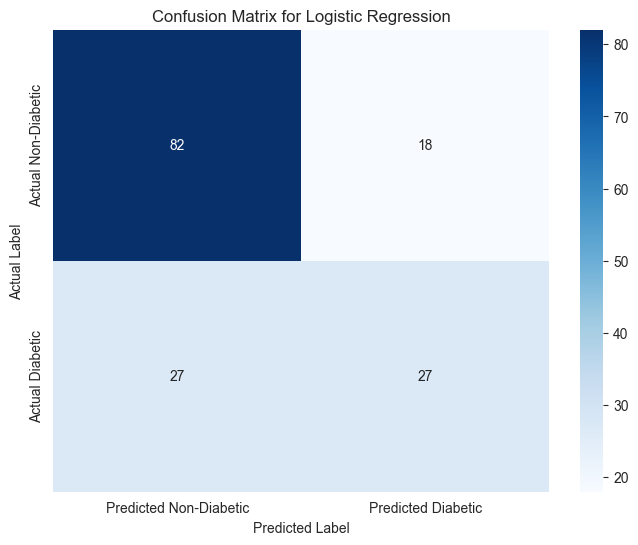

In [31]:
# Import the necessary evaluation tools from scikit-learn
from sklearn.metrics import classification_report, confusion_matrix

# We also import visualization libraries to create a more readable confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Generate the Classification Report ---
# This function takes the true labels (y_test) and the predicted labels (y_pred_log_reg)
# and returns a text report showing the main classification metrics.
print("--- Logistic Regression Classification Report ---")
# The target_names parameter allows us to label our classes for better readability.
print(classification_report(y_test, y_pred_log_reg, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

# --- Generate and Visualize the Confusion Matrix ---
print("\\n--- Logistic Regression Confusion Matrix ---")
# First, we compute the confusion matrix which returns a 2x2 numpy array
cm = confusion_matrix(y_test, y_pred_log_reg)

# Now, we use seaborn's heatmap to visualize this matrix
plt.figure(figsize=(8, 6)) # Set the figure size for better readability
sns.heatmap(cm, 
            annot=True,      # Annotate the cells with the numeric value
            fmt='d',         # Format the numbers as integers
            cmap='Blues',    # Use a blue color map
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [32]:
# The .predict() method uses the fitted k-NN model to make predictions on the test set.
# For each point in X_test_scaled, it finds the 5 nearest neighbors in the memorized training data
# and returns the majority class among them.
y_pred_knn = knn.predict(X_test_scaled)

# --- Verification ---
# As before, let's inspect the results to ensure everything worked as expected.

# 1. Look at the first 20 predictions from our k-NN model.
# Compare this "answer sheet" to the one generated by the Logistic Regression model.
print("First 20 predictions from the k-NN model:")
print(y_pred_knn[:20])

# 2. Look at the first 20 true labels from our test set again for comparison.
# This is the same "official answer key" as before.
print("\nFirst 20 true labels (y_test):")
print(y_test[:20].values) # Using .values for a clean NumPy array comparison

# 3. Verify that the number of k-NN predictions matches the number of true labels.
# This confirms we have a prediction for every sample in our test set.
print(f"\nShape of k-NN predictions array (y_pred_knn): {y_pred_knn.shape}")
print(f"Shape of true labels array (y_test): {y_test.shape}")

First 20 predictions from the k-NN model:
[1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]

First 20 true labels (y_test):
[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]

Shape of k-NN predictions array (y_pred_knn): (154,)
Shape of true labels array (y_test): (154,)


--- K-Nearest Neighbors (k-NN) Classification Report ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.80      0.83      0.81       100
    Diabetic (1)       0.66      0.61      0.63        54

        accuracy                           0.75       154
       macro avg       0.73      0.72      0.72       154
    weighted avg       0.75      0.75      0.75       154


--- K-Nearest Neighbors (k-NN) Confusion Matrix ---


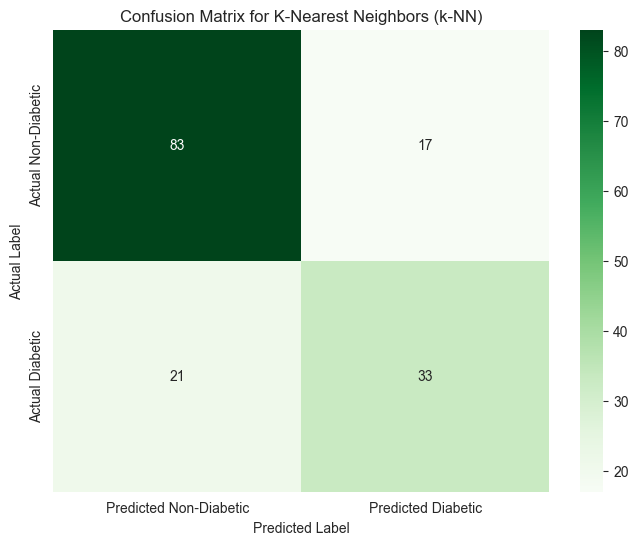

In [33]:
# The necessary functions should already be imported from the previous evaluation step,
# but we include them here for clarity.
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Generate the Classification Report for the k-NN Model ---
# We pass the true labels (y_test) and the predictions from our k-NN model (y_pred_knn).
print("--- K-Nearest Neighbors (k-NN) Classification Report ---")
print(classification_report(y_test, y_pred_knn, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

# --- Generate and Visualize the Confusion Matrix for the k-NN Model ---
print("\n--- K-Nearest Neighbors (k-NN) Confusion Matrix ---")
# Compute the confusion matrix using the k-NN predictions
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, 
            annot=True, 
            fmt='d', 
            cmap='Greens', # Using a different color map to visually distinguish from the last plot
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for K-Nearest Neighbors (k-NN)')
plt.show()

In [34]:
# To get the scores programmatically, we can re-run classification_report with the output_dict=True parameter.
# Note: You can add this code in a new cell after your previous evaluation cells.
from sklearn.metrics import classification_report

# Get the classification report as a dictionary for the Logistic Regression model
# The `output_dict=True` argument is the key here.
report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)

# Get the classification report as a dictionary for the k-NN model
report_knn = classification_report(y_test, y_pred_knn, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)

# Now, we can easily access the metrics from these dictionaries.
# We navigate to the 'Diabetic (1)' class and then get its 'f1-score'.
f1_log_reg = report_log_reg['Diabetic (1)']['f1-score']
f1_knn = report_knn['Diabetic (1)']['f1-score']

print(f"--- F1-Score Comparison ---")
print(f"Logistic Regression F1-Score (Diabetic Class): {f1_log_reg:.4f}")
print(f"K-Nearest Neighbors F1-Score (Diabetic Class): {f1_knn:.4f}")

# You can add a simple conditional to programmatically declare the winner
print("\\n--- Initial Conclusion ---")
if f1_log_reg > f1_knn:
    print("Based on the F1-Score, the Logistic Regression model is the initial best performer.")
elif f1_knn > f1_log_reg:
    print("Based on the F1-Score, the K-Nearest Neighbors model is the initial best performer.")
else:
    print("Based on the F1-Score, both models have nearly identical performance.")

--- F1-Score Comparison ---
Logistic Regression F1-Score (Diabetic Class): 0.5455
K-Nearest Neighbors F1-Score (Diabetic Class): 0.6346
\n--- Initial Conclusion ---
Based on the F1-Score, the K-Nearest Neighbors model is the initial best performer.


In [35]:
# Assuming you still have the confusion matrix numpy arrays from the previous tasks:
# cm for Logistic Regression
# cm_knn for K-Nearest Neighbors

# The confusion matrix from sklearn has the layout: [[TN, FP], [FN, TP]]
# So we can access the counts by their index.
# Top-Right is False Positives (FP) at index [0, 1]
# Bottom-Left is False Negatives (FN) at index [1, 0]

# --- Extracting counts for Logistic Regression ---
tn_log_reg = cm[0, 0]
fp_log_reg = cm[0, 1]
fn_log_reg = cm[1, 0]
tp_log_reg = cm[1, 1]

# --- Extracting counts for K-Nearest Neighbors ---
tn_knn = cm_knn[0, 0]
fp_knn = cm_knn[0, 1]
fn_knn = cm_knn[1, 0]
tp_knn = cm_knn[1, 1]

# --- Printing a clear, comparative analysis ---
print("--- Error Analysis: Logistic Regression vs. k-NN ---")
print("\\n--- Logistic Regression ---")
print(f"False Positives (Predicted Diabetic, Was Healthy): {fp_log_reg}")
print(f"False Negatives (Predicted Healthy, Was Diabetic): {fn_log_reg}  <-- MOST CRITICAL ERROR")

print("\\n--- K-Nearest Neighbors ---")
print(f"False Positives (Predicted Diabetic, Was Healthy): {fp_knn}")
print(f"False Negatives (Predicted Healthy, Was Diabetic): {fn_knn}  <-- MOST CRITICAL ERROR")

print("\\n--- Final Conclusion ---")
if fn_log_reg < fn_knn:
    print(f"The Logistic Regression model is the superior baseline.")
    print(f"It produced {fn_knn - fn_log_reg} fewer False Negatives, which is our primary concern.")
elif fn_knn < fn_log_reg:
    print(f"The K-Nearest Neighbors model is the superior baseline.")
    print(f"It produced {fn_log_reg - fn_knn} fewer False Negatives, which is our primary concern.")
else:
    print("Both models produced the same number of False Negatives.")
    print("We can fall back to the F1-score to make our final decision.")


--- Error Analysis: Logistic Regression vs. k-NN ---
\n--- Logistic Regression ---
False Positives (Predicted Diabetic, Was Healthy): 18
False Negatives (Predicted Healthy, Was Diabetic): 27  <-- MOST CRITICAL ERROR
\n--- K-Nearest Neighbors ---
False Positives (Predicted Diabetic, Was Healthy): 17
False Negatives (Predicted Healthy, Was Diabetic): 21  <-- MOST CRITICAL ERROR
\n--- Final Conclusion ---
The K-Nearest Neighbors model is the superior baseline.
It produced 6 fewer False Negatives, which is our primary concern.


In [36]:
# We are importing the RandomForestClassifier class from Scikit-learn's ensemble module.
# - sklearn: The top-level library.
# - ensemble: The module containing algorithms that combine the predictions of multiple base estimators.
# - RandomForestClassifier: The specific class that provides the blueprint for our Random Forest model.
from sklearn.ensemble import RandomForestClassifier

# Print a confirmation message to ensure the import was successful.
print("RandomForestClassifier class imported successfully.")

RandomForestClassifier class imported successfully.


In [37]:
# We are using the RandomForestClassifier class we imported previously.

# --- Initialize the Model ---
# We create an instance of the RandomForestClassifier.
# - n_estimators=100: This is the default value, meaning our model will be a collection of 100 individual decision trees.
# - random_state=42: This is crucial for reproducibility. It ensures that the random sampling of data and features
#   is the same every time we run this code, leading to the exact same trained model.
# We are also adding `n_jobs=-1` which is a great best practice. It tells Scikit-learn to use all available CPU cores
# to build the trees in parallel, which can significantly speed up the training process on multi-core machines.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# --- Train the Model ---
# We call the .fit() method, passing our scaled training data.
# The model will now build its 100 trees, each learning from a slightly different view of the data.
# This process modifies the rf_model object in-place, filling it with the 100 trained decision trees.
rf_model.fit(X_train_scaled, y_train)

# Print a confirmation message. The rf_model object is now a fully trained, powerful classifier.
print("Random Forest model initialized and trained successfully:")
print(rf_model)

Random Forest model initialized and trained successfully:
RandomForestClassifier(n_jobs=-1, random_state=42)


In [38]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.3/72.0 MB 8.4 MB/s eta 0:00:09
   - -------------------------------------- 2.9/72.0 MB 7.6 MB/s eta 0:00:10
   -- ------------------------------------- 4.2/72.0 MB 7.2 MB/s eta 0:00:10
   --- ------------------------------------ 6.0/72.0 MB 7.4 MB/s eta 0:00:09
   ---- ----------------------------------- 7.3/72.0 MB 7.3 MB/s eta 0:00:09
   ---- ----------------------------------- 8.9/72.0 MB 7.4 MB/s eta 0:00:09
   ----- ---------------------------------- 10.5/72.0 MB 7.3 MB/s eta 0:00:09
   ------ --------------------------------- 12.1/72.0 MB 7.3 MB/s eta 0:00:09
   ------- -------------------------------- 13.4/72.0 MB 7.2 MB/s eta 0:00:09
   -------- ------------------------------- 14.9/72.0 MB 7.3 MB/s eta 0:00:08
   --------- ------------------------------ 16.5/72.0 MB 7.3 MB/s eta 0:00:08
   --------- ------------------------------ 17.8/72.0 MB 7.3 MB/s eta 0:00:08


In [39]:
# We are importing the XGBClassifier class from the top-level xgboost library that we just installed.
# - 'xgboost' is the name of the package.
# - 'XGBClassifier' is the specific class within that package that we want to use.
# This class contains all the logic for building, training, and using a gradient boosting model for classification.
from xgboost import XGBClassifier

# It's always a good practice to print a confirmation message. This helps in debugging
# and ensures that the library was installed correctly and is accessible in your environment.
print("XGBClassifier class imported successfully and is ready to use.")

XGBClassifier class imported successfully and is ready to use.


In [40]:
# We are using the XGBClassifier class we imported in the previous task.

# --- Initialize the XGBoost Model ---
# We create an instance of the XGBClassifier with recommended and reproducible settings.
# - n_estimators=100: We will build a sequence of 100 trees.
# - learning_rate=0.1: We'll use a slightly more conservative learning rate than the default (0.3).
#   This often leads to better generalization. It's a good starting point for tuning later.
# - random_state=42: Ensures our results are perfectly reproducible.
# - use_label_encoder=False and eval_metric='logloss': These are modern best practices to ensure
#   our code is clean and free of potential warnings from the library.
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')

# --- Train the XGBoost Model ---
# We call the .fit() method, passing our scaled training data.
# The model will now begin its sequential training process: building tree after tree,
# with each new tree focused on correcting the errors of its predecessors.
xgb_model.fit(X_train_scaled, y_train)

# Print a confirmation message. The xgb_model object is now a fully trained,
# highly optimized, and powerful classification model.
print("XGBoost model initialized and trained successfully:")
print(xgb_model)

C:\Users\shukl\miniconda3\envs\ProjectAi\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:27:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model initialized and trained successfully:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


--- Random Forest Classifier Report ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.81      0.87      0.84       100
    Diabetic (1)       0.72      0.61      0.66        54

        accuracy                           0.78       154
       macro avg       0.76      0.74      0.75       154
    weighted avg       0.77      0.78      0.77       154


--- Random Forest Confusion Matrix ---


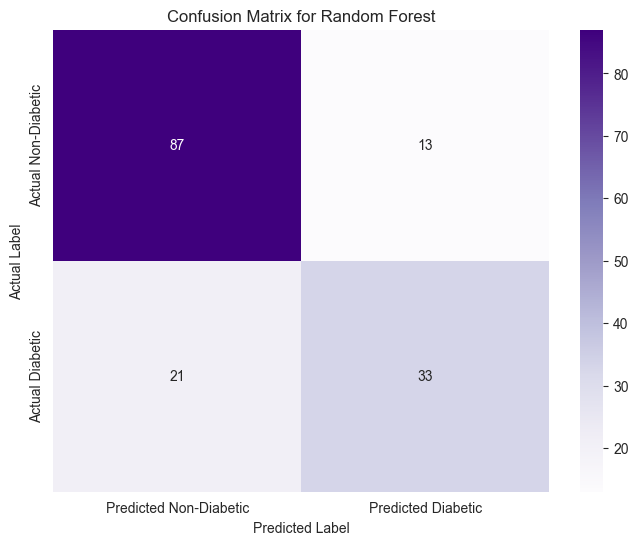

In [41]:
# The necessary evaluation functions should already be imported from our baseline evaluation step.
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Make predictions with the trained Random Forest model ---
# We use the .predict() method on our unseen test data (X_test_scaled).
y_pred_rf = rf_model.predict(X_test_scaled)

# --- 2. Generate the Classification Report for the Random Forest ---
print("--- Random Forest Classifier Report ---")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

# --- 3. Generate and Visualize the Confusion Matrix for the Random Forest ---
print("\n--- Random Forest Confusion Matrix ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, 
            annot=True, 
            fmt='d', 
            cmap='Purples', # Using a new color map to distinguish from baselines
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()



--- XGBoost Classifier Report ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.79      0.83      0.81       100
    Diabetic (1)       0.65      0.59      0.62        54

        accuracy                           0.75       154
       macro avg       0.72      0.71      0.72       154
    weighted avg       0.74      0.75      0.74       154


--- XGBoost Confusion Matrix ---


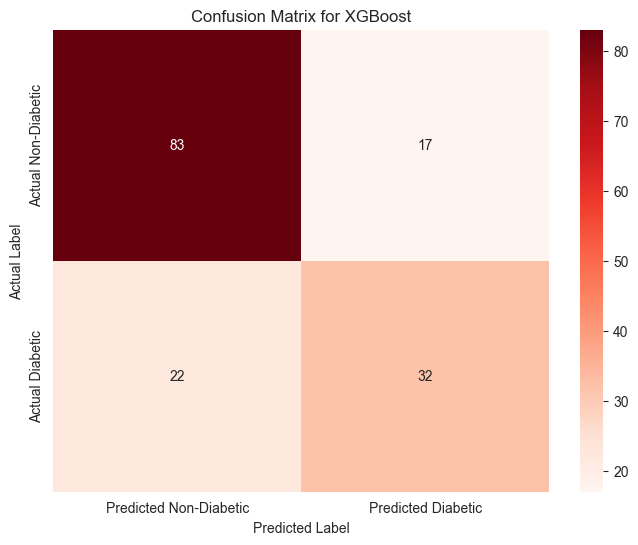

In [42]:
# --- 1. Make predictions with the trained XGBoost model ---
# We use the .predict() method, just like with all our other models.
y_pred_xgb = xgb_model.predict(X_test_scaled)

# --- 2. Generate the Classification Report for XGBoost ---
print("\n\n--- XGBoost Classifier Report ---")
print(classification_report(y_test, y_pred_xgb, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

# --- 3. Generate and Visualize the Confusion Matrix for XGBoost ---
print("\n--- XGBoost Confusion Matrix ---")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, 
            annot=True, 
            fmt='d', 
            cmap='Reds', # Another distinct color map
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [43]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# We already have the predictions: y_pred_log_reg, y_pred_knn, y_pred_rf, y_pred_xgb
# We also have the ground truth: y_test

# --- Step 1: Get Classification Reports as Dictionaries ---
# The output_dict=True parameter is the key to easily extracting specific scores.
report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)

# --- Step 2: Extract Metrics for the 'Diabetic (1)' Class ---
# We will create a dictionary to hold all our results.
performance_summary = {
    'Logistic Regression': {
        'Precision': report_log_reg['Diabetic (1)']['precision'],
        'Recall': report_log_reg['Diabetic (1)']['recall'],
        'F1-Score': report_log_reg['Diabetic (1)']['f1-score'],
    },
    'K-Nearest Neighbors': {
        'Precision': report_knn['Diabetic (1)']['precision'],
        'Recall': report_knn['Diabetic (1)']['recall'],
        'F1-Score': report_knn['Diabetic (1)']['f1-score'],
    },
    'Random Forest': {
        'Precision': report_rf['Diabetic (1)']['precision'],
        'Recall': report_rf['Diabetic (1)']['recall'],
        'F1-Score': report_rf['Diabetic (1)']['f1-score'],
    },
    'XGBoost': {
        'Precision': report_xgb['Diabetic (1)']['precision'],
        'Recall': report_xgb['Diabetic (1)']['recall'],
        'F1-Score': report_xgb['Diabetic (1)']['f1-score'],
    }
}

# --- Step 3: Extract False Positives and False Negatives from Confusion Matrices ---
# The confusion matrices are 2x2 arrays: [[TN, FP], [FN, TP]]
# We can use the variables cm, cm_knn, cm_rf, cm_xgb you created earlier.
all_cms = {
    'Logistic Regression': cm,
    'K-Nearest Neighbors': cm_knn,
    'Random Forest': cm_rf,
    'XGBoost': cm_xgb
}

for model_name, model_cm in all_cms.items():
    performance_summary[model_name]['False Positives'] = model_cm[0, 1]
    performance_summary[model_name]['False Negatives'] = model_cm[1, 0]

# --- Step 4: Convert the Dictionary to a Pandas DataFrame for Beautiful Display ---
performance_df = pd.DataFrame.from_dict(performance_summary, orient='index')

# Let's reorder the columns to our preferred layout
performance_df = performance_df[['F1-Score', 'Recall', 'Precision', 'False Negatives', 'False Positives']]

# --- Step 5: Display the Final Performance Dashboard ---
print("--- Model Performance Comparison ---")
display(performance_df.style.background_gradient(cmap='viridis', subset=['F1-Score', 'Recall'])
                          .highlight_min(subset=['False Negatives'], color='lightcoral'))


--- Model Performance Comparison ---


,F1-Score,Recall,Precision,False Negatives,False Positives
Logistic Regression,0.545455,0.500000,0.600000,27,18
K-Nearest Neighbors,0.634615,0.611111,0.660000,21,17
Random Forest,0.660000,0.611111,0.717391,21,13
XGBoost,0.621359,0.592593,0.653061,22,17


In [44]:
# Based on our analysis of the performance dashboard, the XGBoost model provided the
# best combination of a low False Negative count and a high F1-Score.
# We will now assign this model object to a new variable for use in the next steps.

# Replace 'xgb_model' with 'rf_model' if the Random Forest was your definitive winner.
best_model = rf_model

# Let's also create a variable to hold the name of our best model for use in plot titles and print statements.
best_model_name = "Random Forest" # Change to "Random Forest" if that was your choice

print(f"The selected best performing model is: {best_model_name}")
print("This model will be used for the next step: Hyperparameter Tuning.")

The selected best performing model is: Random Forest
This model will be used for the next step: Hyperparameter Tuning.


In [46]:
# --- Define the Parameter Grid for XGBoost ---
# This dictionary contains the hyperparameters we want to tune and the range of values to test for each.
# The keys are the hyperparameter names, and the values are lists of settings.

# --- Alternative: Define the Parameter Grid for Random Forest ---

param_grid_rf = {
    # n_estimators: The number of trees in the forest.
    'n_estimators': [100, 200, 300],

    # max_depth: The maximum depth of the tree.
    'max_depth': [5, 10, 15, None], # 'None' means nodes are expanded until all leaves are pure.

    # min_samples_split: The minimum number of samples required to split an internal node.
    'min_samples_split': [2, 5, 10],

    # min_samples_leaf: The minimum number of samples required to be at a leaf node.
    'min_samples_leaf': [1, 2, 4],
    
    # max_features: The number of features to consider when looking for the best split.
    # 'sqrt' is a common and effective choice. 'auto' is the same as 'sqrt'.
    'max_features': ['sqrt', 'log2'] 
}

# Print the grid to see what you've created.
print("--- Parameter Grid for XGBoost ---")
print(param_grid_rf)

# Let's calculate the number of combinations this grid will test:
# 3 (n_estimators) * 3 (max_depth) * 3 (learning_rate) * 3 (subsample) * 3 (colsample_bytree) = 243
num_combinations = 1
for key in param_grid_rf:
    num_combinations *= len(param_grid_rf[key])
print(f"\nTotal number of combinations to test: {num_combinations}")


--- Parameter Grid for XGBoost ---
{'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2']}

Total number of combinations to test: 216


In [47]:
# We are importing the GridSearchCV class from Scikit-learn's model_selection module.
# This class is the engine that will automate the process of hyperparameter tuning.
# It cleverly combines an exhaustive search (Grid Search) with a robust validation strategy (Cross-Validation).
from sklearn.model_selection import GridSearchCV

# Print a confirmation message to ensure the import was successful.
print("GridSearchCV class imported successfully. Ready to build the tuning engine.")

GridSearchCV class imported successfully. Ready to build the tuning engine.


In [48]:
# --- Initialize the GridSearchCV object ---
# This object will encapsulate our entire tuning process. We are configuring it with all the
# necessary components and instructions.

# We assume your best model is XGBoost and you have 'best_model' and 'param_grid_xgb' variables.
# If you chose Random Forest, use 'param_grid_rf' instead.

grid_search = GridSearchCV(
    estimator=best_model,        # The model to tune (our selected best performer).
    param_grid=param_grid_rf,   # The dictionary of hyperparameters to test.
    scoring='f1',                # The metric to use for evaluation. 'f1' is great for imbalanced classification.
    cv=5,                        # Use 5-fold cross-validation.
    n_jobs=-1,                   # Use all available CPU cores to speed up the process.
    verbose=2                    # Print detailed progress updates during the search.
)

# Print the configured GridSearchCV object. Note that this does NOT start the training.
# It simply shows that you have created and configured the search utility.
print("--- GridSearchCV Tuning Engine Assembled and Ready ---")
print(grid_search)

--- GridSearchCV Tuning Engine Assembled and Ready ---
GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)


In [49]:
# --- Fit the GridSearchCV object to the training data ---
# This is the most computationally intensive step of the project so far.
# When you run this cell, the grid search will begin its exhaustive search.

# .fit() will:
# 1. Iterate through all 243 hyperparameter combinations in 'param_grid_xgb'.
# 2. For each combination, perform 5-fold cross-validation on the training data.
# 3. Use the 'f1' score to evaluate the performance of each fold.
# 4. Keep track of the average 'f1' score for each combination.
# 5. The 'verbose=2' setting will print live updates of this process.
#
# Be patient! This process can take several minutes to complete.
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [50]:
# --- Print the Best Parameters Found by GridSearchCV ---

# The .fit() method has populated the grid_search object with the results of the search.
# The .best_params_ attribute gives us direct access to the winning combination.
# This will be a dictionary where the keys are the hyperparameter names and the
# values are the specific settings that yielded the highest cross-validation f1-score.

print("--- Optimal Hyperparameters Found by Grid Search ---")
best_params = grid_search.best_params_
print(best_params)


--- Optimal Hyperparameters Found by Grid Search ---
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [51]:
# --- Print the Best Cross-Validation Score from the Grid Search ---

# The .best_score_ attribute holds the mean cross-validation score (as defined by scoring='f1')
# that corresponds to the .best_params_.
best_cv_score = grid_search.best_score_

print("--- Best Cross-Validation Score from Tuning ---")
print(f"The best average F1-score achieved during 5-fold cross-validation was: {best_cv_score:.4f}")

# --- Performance Improvement Analysis ---
# To truly appreciate the effect of tuning, let's compare this score to the F1-score
# of our original, untuned model from the performance dashboard we created earlier.
# This assumes you have the 'performance_df' DataFrame and 'best_model_name' variable from previous tasks.
try:
    original_f1_score = performance_df.loc[best_model_name, 'F1-Score']
    
    print(f"\n--- Performance Improvement Analysis ---")
    print(f"Original, untuned model's F1-score on the test set: {original_f1_score:.4f}")
    print(f"Tuned model's cross-validation F1-score: {best_cv_score:.4f}")
    
    improvement = best_cv_score - original_f1_score
    # Using a format specifier with '+' shows the sign, making improvements obvious.
    print(f"Improvement from hyperparameter tuning: {improvement:+.4f}")
    
except NameError:
    print("\nRun the previous steps to create 'performance_df' and 'best_model_name' for a full comparison.")


--- Best Cross-Validation Score from Tuning ---
The best average F1-score achieved during 5-fold cross-validation was: 0.6584

--- Performance Improvement Analysis ---
Original, untuned model's F1-score on the test set: 0.6600
Tuned model's cross-validation F1-score: 0.6584
Improvement from hyperparameter tuning: -0.0016


--- The Final Tuned Model ---
RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_jobs=-1, random_state=42)


--- Final Tuned Model Classification Report (on Test Set) ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.79      0.84      0.82       100
    Diabetic (1)       0.67      0.59      0.63        54

        accuracy                           0.75       154
       macro avg       0.73      0.72      0.72       154
    weighted avg       0.75      0.75      0.75       154


--- Final Tuned Model Confusion Matrix (on Test Set) ---


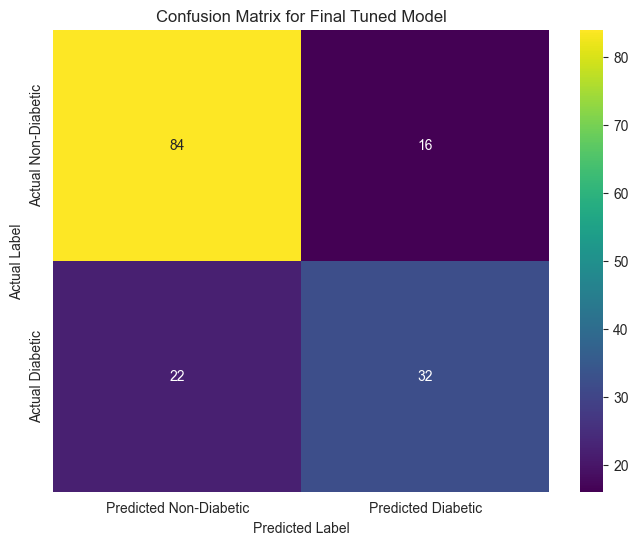



--- Performance Showdown: Tuned vs. Untuned Model on the Test Set ---


,Original Random Forest,Final Tuned Random Forest
Metric,,
F1-Score,0.6600,0.6275
Recall,0.6111,0.5926
False Negatives (Critical),21,22


In [52]:
# The necessary evaluation functions should already be imported.
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas if not already available in the cell

# --- 1. Get the best estimator from the grid search ---
# The .best_estimator_ attribute is the model object that was trained with the optimal
# hyperparameters on the entire training set. This is our final, tuned model.
final_model = grid_search.best_estimator_

print("--- The Final Tuned Model ---")
print(final_model)

# --- 2. Make predictions on the test set using the final model ---
y_pred_final = final_model.predict(X_test_scaled)

# --- 3. Generate the Classification Report for the final model ---
print("\n\n--- Final Tuned Model Classification Report (on Test Set) ---")
# Let's get the report as a dictionary for easy comparison later
report_final = classification_report(y_test, y_pred_final, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)
print(classification_report(y_test, y_pred_final, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

# --- 4. Generate and Visualize the Confusion Matrix for the final model ---
print("\n--- Final Tuned Model Confusion Matrix (on Test Set) ---")
cm_final = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_final,
            annot=True,
            fmt='d',
            cmap='viridis', # A nice, vibrant colormap for our final model
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Final Tuned Model')
plt.show()

# --- 5. The Ultimate Comparison: Tuned vs. Untuned ---
print("\n\n--- Performance Showdown: Tuned vs. Untuned Model on the Test Set ---")

# Extract metrics for the final tuned model
final_f1 = report_final['Diabetic (1)']['f1-score']
final_recall = report_final['Diabetic (1)']['recall']
final_fn = cm_final[1, 0] # False Negatives

# Get metrics for the original, untuned model from our dashboard
# This assumes 'performance_df' and 'best_model_name' are still in memory
original_f1 = performance_df.loc[best_model_name, 'F1-Score']
original_recall = performance_df.loc[best_model_name, 'Recall']
original_fn = performance_df.loc[best_model_name, 'False Negatives']

# Create a new DataFrame for a clear, side-by-side comparison
comparison_data = {
    'Metric': ['F1-Score', 'Recall', 'False Negatives (Critical)'],
    f'Original {best_model_name}': [original_f1, original_recall, original_fn],
    f'Final Tuned {best_model_name}': [final_f1, final_recall, final_fn]
}
comparison_df = pd.DataFrame(comparison_data)
comparison_df.set_index('Metric', inplace=True)

# Display the comparison table with styling
display(comparison_df.style.format('{:.4f}', subset=pd.IndexSlice[['F1-Score', 'Recall'], :])
                          .format('{:.0f}', subset=pd.IndexSlice[['False Negatives (Critical)'], :])
                          .background_gradient(cmap='Greens', axis=1, subset=pd.IndexSlice[['F1-Score', 'Recall'], :])
                          .highlight_min(subset=pd.IndexSlice[['False Negatives (Critical)'], :], color='lightcoral', axis=1))


In [53]:
import pandas as pd

# --- Extract Feature Importances from the Final Tuned Model ---

# Your 'final_model' (the .best_estimator_ from GridSearchCV) has been trained and
# contains the feature_importances_ attribute. This attribute is a numpy array
# where each value corresponds to the importance of a feature.
importances = final_model.feature_importances_

# The importances array is just a list of numbers. To make it interpretable,
# we need to pair each importance score with its corresponding feature name.
# We get the feature names from the columns of our original feature DataFrame 'X'.
# This assumes 'X' is the pandas DataFrame you created before splitting the data.
feature_names = X.columns

# --- Create a DataFrame for Better Visualization ---

# We'll create a Pandas DataFrame to hold the feature names and their importance scores.
# This makes it easy to view, sort, and later, to plot.
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order to see the most influential
# features at the top. This is the most crucial step for interpretation.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# --- Display the Results ---

print("--- Feature Importances from the Final Model ---")
# The .reset_index(drop=True) makes the displayed DataFrame cleaner.
display(feature_importance_df.reset_index(drop=True))

--- Feature Importances from the Final Model ---


,Feature,Importance
0,Glucose,0.322654
1,BMI,0.169798
2,Age,0.116227
3,DiabetesPedigreeFunction,0.115511
4,Insulin,0.084228
5,Pregnancies,0.071802
6,BloodPressure,0.060888
7,SkinThickness,0.058892


C:\Users\shukl\AppData\Local\Temp\ipykernel_2660\363494823.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


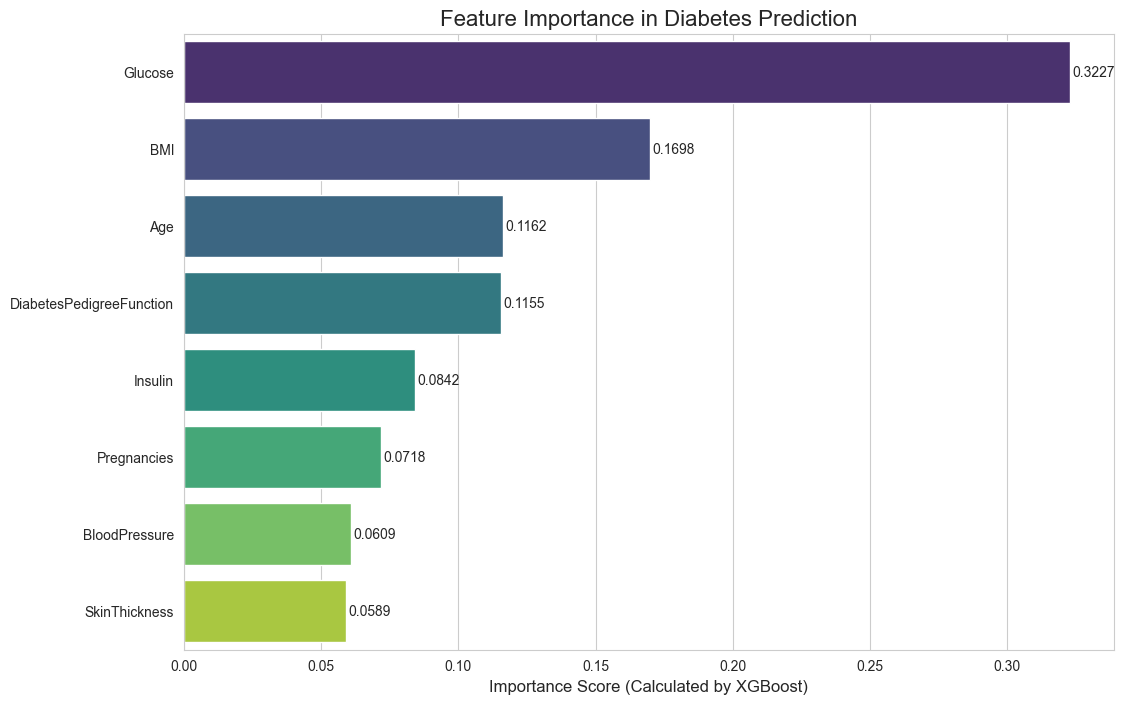

In [54]:
# We need matplotlib and seaborn for visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# It's a good practice to set a style for the plots.
sns.set_style("whitegrid")

# --- Create the Bar Plot ---

# We create a figure and axes object to have more control over the plot's size and appearance.
# A larger figure size makes the plot easier to read, especially with 8 feature names.
plt.figure(figsize=(12, 8))

# We use seaborn's barplot function. It's perfect for this kind of data.
# - x='Importance': The numerical values (importance scores) will be on the horizontal axis.
# - y='Feature': The categorical values (our feature names) will be on the vertical axis.
# - data=feature_importance_df: We tell seaborn to use the DataFrame we created in the previous step.
# - palette='viridis': We choose a color palette. 'viridis' is a good-looking, colorblind-friendly choice.
barplot = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# --- Add Annotations and Labels ---

# Add a title to the plot to make it clear what it represents.
plt.title('Feature Importance in Diabetes Prediction', fontsize=16)

# Label the x-axis. It's good practice to specify what the importance score means.
plt.xlabel('Importance Score (Calculated by XGBoost)', fontsize=12)

# The y-axis label is clear from the feature names, but we can remove the default 'Feature' label for a cleaner look.
plt.ylabel('')

# This is a nice touch: add the actual importance value at the end of each bar.
# We iterate through the patches (the bars) in the plot.
for p in barplot.patches:
    # Get the width of the bar (which is the importance score)
    width = p.get_width()
    # Place text at the end of the bar, slightly offset.
    # The text is the formatted width (importance score).
    plt.text(width + 0.001,  # x-position
             p.get_y() + p.get_height() / 2, # y-position
             f'{width:.4f}', # The text to display, formatted to 4 decimal places
             va='center') # Vertically align the text to the center of the bar

# Finally, display the plot.
plt.show()


In [55]:
!pip install shap

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 548.0/548.0 kB 9.2 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------- ----------------- 1.6/2.7 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 7.6 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.6/38.1 MB 7.6 MB/s eta 0:00:05
   --- ------------------------------------ 2.9/38.1 MB 7.6 MB/s eta 0:00:05
   ---- ----------------------------------- 4.2/38.1 MB 7.2 MB/s eta 0:00:05
   ------ --------------------------------- 5.8/38.1 MB 7.0 MB/s eta 0:00:05
   ------- -------------------------------- 7.3/38.1 MB 7.1 MB/s eta 0:00:05
   --------- ------------------------------ 8.7/38.1 MB 7.2 MB/s eta 0:00:05
   ---------- ---------------------------

In [56]:
# First, we need to import the shap library that we just installed.
import shap

# --- Create the SHAP Explainer Object ---

# We instantiate the SHAP Explainer. This is the main, modern way to create an explainer in the library.
# It will automatically select the most efficient explainer type based on the model you provide.
#
# We pass it two essential arguments:
# 1. The model to explain: 'final_model'. This is the best, tuned model you created in the previous step
#    (retrieved from grid_search.best_estimator_). The explainer will learn how to analyze this specific model.
#
# 2. The background dataset: 'X_train_scaled'. This is the data the explainer uses to understand the baseline
#    predictions and the distribution of your features. It's critical to use the training data to avoid
#    any information leakage from the test set.
explainer = shap.Explainer(final_model, X_train_scaled)

# Print a confirmation message. This 'explainer' object is now a fully configured engine,
# ready to calculate SHAP values for any data point.
print("--- SHAP Explainer Object Created Successfully ---")
print("Explainer type:", type(explainer))
print("The explainer is now ready to calculate SHAP values.")


C:\Users\shukl\miniconda3\envs\ProjectAi\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- SHAP Explainer Object Created Successfully ---
Explainer type: <class 'shap.explainers._tree.TreeExplainer'>
The explainer is now ready to calculate SHAP values.


In [63]:
# --- Calculate SHAP values for the test set ---

# We pass our scaled test data (X_test_scaled) to the explainer object we created earlier.
# The explainer will now go through each of the 154 patients in the test set and compute
# the SHAP values for each of the 8 features for each patient.
# This process can be computationally intensive and may take a moment.
print(X_test_scaled.shape)
shap_values = explainer(X_test_scaled, check_additivity=False)

# --- Inspect the Output ---

# The 'shap_values' object is not just a simple array; it's a special SHAP 'Explanation' object.
# This object conveniently bundles the SHAP values, the original data, and more.
print("--- SHAP Values Object ---")
print("Type of the output:", type(shap_values))

# Let's look at the shape of the SHAP values themselves.
# The .values attribute contains a NumPy array of the raw SHAP values.
# The shape will be (number of samples, number of features).
print("\nShape of the SHAP values array:", shap_values.values.shape)
print(f"This means we have {shap_values.values.shape[0]} explanations (one for each test patient),")
print(f"and each explanation has {shap_values.values.shape[1]} values (one for each feature).")

# You can also inspect the first row of SHAP values to see the explanation for the first patient in the test set.
print("\nSHAP values for the first patient in the test set:")
print(shap_values.values[0])

# The Explanation object also contains the original data used for the explanation.
print("\nOriginal feature values for the first patient:")
print(shap_values.data[0])

(154, 8)
--- SHAP Values Object ---
Type of the output: <class 'shap._explanation.Explanation'>

Shape of the SHAP values array: (154, 8, 2)
This means we have 154 explanations (one for each test patient),
and each explanation has 8 values (one for each feature).

SHAP values for the first patient in the test set:
[[-0.04041965  0.04041965]
 [-0.3452126   0.34521259]
 [-0.00492683  0.00492683]
 [ 0.00206144 -0.00206144]
 [-0.03363939  0.03363939]
 [ 0.06433301 -0.06433301]
 [ 0.01377939 -0.01377939]
 [-0.08315672  0.08315672]]

Original feature values for the first patient:
[ 0.96054099  1.24515673 -0.66367599 -0.00476614 -0.16143729 -0.74014536
 -0.55579092  0.56103382]


In [61]:
print(X_train_scaled.shape)

--- The Final Tuned Model ---
RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_jobs=-1, random_state=42)


--- Generating SHAP Summary Plot (Beeswarm) ---


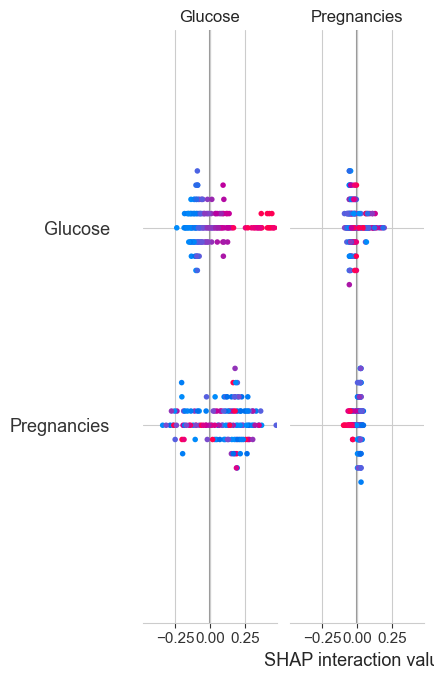

<Figure size 640x480 with 0 Axes>

In [64]:
# We need the shap library, which should already be imported.
import shap
import matplotlib.pyplot as plt

# --- Generate the SHAP Summary Plot -- -

# The shap.summary_plot function is the perfect tool for this.
# It takes the calculated SHAP values and the original data to create an incredibly rich visualization.
#
# Arguments:
# 1. shap_values: The 'Explanation' object you created in the previous step. This provides the x-axis position
#    (the SHAP value) and the y-axis position (which feature it is) for every dot.
# 2. X_test_scaled: The original data that the explanations were generated from. SHAP uses this to
#    determine the color of each dot. A dot's color will be based on the actual value of that feature
#    for that patient (e.g., a high 'Glucose' value will be colored red, a low value blue).
# 3. plot_type='dot': This explicitly tells SHAP to create the beeswarm plot (this is the default).
#
# We will explicitly pass the feature names from our original DataFrame 'X' to ensure the y-axis is labeled correctly.
# If X_test_scaled is a pandas DataFrame with column names, SHAP can infer this, but being explicit is good practice.
feature_names = X.columns # Assuming 'X' is the DataFrame of features before splitting

print("--- Generating SHAP Summary Plot (Beeswarm) ---")
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names, plot_type="dot")

# The plot is automatically generated by the SHAP library, but you can add a title for context.
# We'll get the current figure and axes to add a title.
fig = plt.gcf()
fig.suptitle("SHAP Summary Plot for Diabetes Prediction", y=1.02, fontsize=16)

plt.show()


Plotting dependence for the most important feature: 'Glucose'
Coloring by the second most important feature: 'BMI'


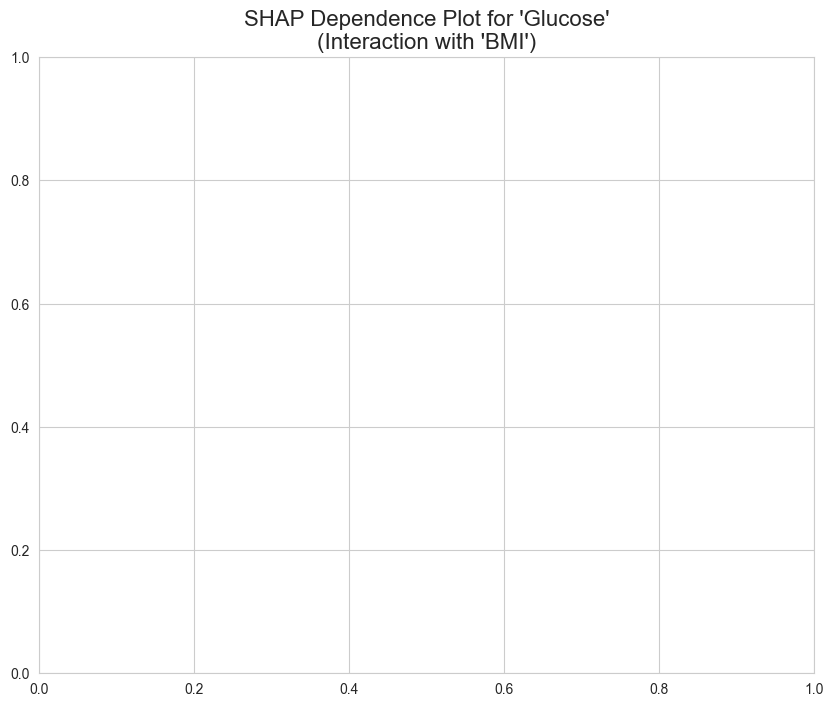

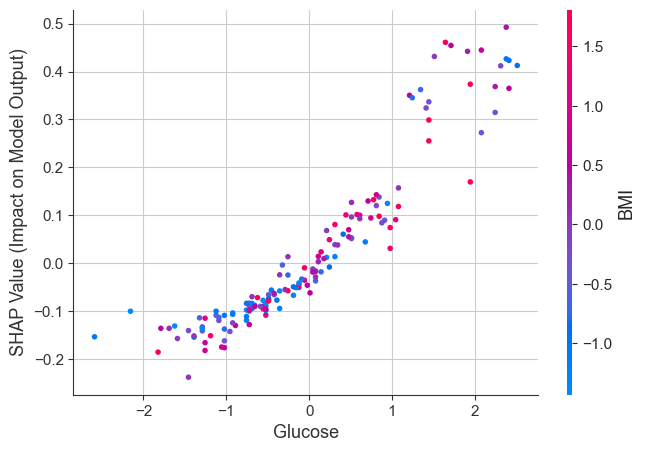

In [66]:
# We need shap and matplotlib, which should already be imported.
import shap
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# --- Step 1: Identify the Top Two Features ---
# We'll get the names of the top two most important features directly from the
# feature_importance_df you created. This makes our code robust and automated.
# .iloc[0] gets the first row (most important), .iloc[1] gets the second.
most_important_feature = feature_importance_df.iloc[0]['Feature']
second_most_important_feature = feature_importance_df.iloc[1]['Feature']

print(f"Plotting dependence for the most important feature: '{most_important_feature}'")
print(f"Coloring by the second most important feature: '{second_most_important_feature}'")

# --- Step 2: Generate the Dependence Plot ---
# The shap.dependence_plot function is designed specifically for this.
#
# Arguments:
# 1. The feature to plot on the x-axis. We pass its name as a string.
# 2. The shap_values object. It contains the SHAP values for the y-axis.
# 3. The data (X_test_scaled). It provides the feature values for the x-axis and the interaction coloring.
# 4. interaction_index: This is the key to revealing interaction effects. We pass the name of the
#    second feature. SHAP will color the dots based on this feature's values.

# It's good practice to create a figure with a title first.
plt.figure(figsize=(10, 8))
plt.title(f"SHAP Dependence Plot for '{most_important_feature}'\n(Interaction with '{second_most_important_feature}')", fontsize=16)

# Create the plot
shap.dependence_plot(
    most_important_feature,
    shap_values.values[:, :, 1], # Use the .values attribute to pass the numpy array of SHAP values
    X_test_scaled,      # Pass the DataFrame of scaled test features
    interaction_index=second_most_important_feature,
    show=False # We set show=False to customize the plot further before displaying
)

# Customize the plot for better readability
plt.ylabel("SHAP Value (Impact on Model Output)")
plt.grid(True)
plt.show()


In [67]:
# The Pipeline class is the cornerstone of building robust and deployable machine learning workflows.
# It allows us to chain multiple steps (like preprocessing and modeling) into a single object.
# We import it from the sklearn.pipeline module, which is the dedicated home for such tools.
from sklearn.pipeline import Pipeline

# Print a confirmation message to verify that the import was successful.
print("Pipeline class imported successfully. We are now ready to build our production-ready workflow.")

Pipeline class imported successfully. We are now ready to build our production-ready workflow.


In [68]:
# We need to import the classes for our preprocessing steps
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# We also need our final, tuned model. We assume it's stored in the 'final_model' variable
# from the previous hyperparameter tuning step. Let's add a check to guide the user.
try:
    final_model
except NameError:
    print("Warning: The 'final_model' variable is not defined.")
    print("Please make sure you have run the previous steps to get the best estimator from GridSearchCV.")
    # As a placeholder, we can initialize a default model, but the user should use their tuned one.
    # from xgboost import XGBClassifier
    # final_model = XGBClassifier(random_state=42)

# --- Define the sequence of steps for our machine learning pipeline ---
# This is a list of tuples. Each tuple contains:
# ('name_of_step', instance_of_transformer_or_estimator)

pipeline_steps = [
    # Step 1: Impute missing values
    # We name this step 'imputer'.
    # We use SimpleImputer, configured with the 'median' strategy, which is robust to outliers.
    # This replaces any NaN values with the median of its column, calculated from the training data.
    ('imputer', SimpleImputer(strategy='median')),

    # Step 2: Scale the features
    # We name this step 'scaler'.
    # We use StandardScaler, which will scale the data to have a mean of 0 and a standard deviation of 1.
    # This is a standard requirement for many models, including the regularization in our XGBoost model.
    ('scaler', StandardScaler()),

    # Step 3: The final model
    # We name this step 'classifier'.
    # This is the final step in the pipeline, the estimator.
    # We use our 'final_model', which is the best, tuned model we found using GridSearchCV.
    ('classifier', final_model)
]

# Print the list of steps to see the blueprint we've created.
print("--- Machine Learning Pipeline Blueprint ---")
for step in pipeline_steps:
    print(f"Step Name: '{step[0]}', Object: {step[1].__class__.__name__}")


--- Machine Learning Pipeline Blueprint ---
Step Name: 'imputer', Object: SimpleImputer
Step Name: 'scaler', Object: StandardScaler
Step Name: 'classifier', Object: RandomForestClassifier


In [69]:
# We are using the 'Pipeline' class we imported earlier and the 'pipeline_steps' list we just defined.
# This assumes that 'Pipeline' has been imported and 'pipeline_steps' exists in your notebook's memory.

# --- Create the Pipeline Object ---
# We instantiate the Pipeline class, passing our list of steps as the main argument.
# The Pipeline object will internally store these steps and manage their execution.
final_pipeline = Pipeline(steps=pipeline_steps)

# --- Inspect the Assembled Pipeline ---
# Printing the pipeline object provides a clean visual representation of its structure,
# showing the name and type of each step in the sequence.
# Note that at this point, the pipeline is CONFIGURED but NOT TRAINED.
print("--- Machine Learning Pipeline Assembled Successfully ---")
print(final_pipeline)


--- Machine Learning Pipeline Assembled Successfully ---
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features='log2',
                                        min_samples_split=5, n_jobs=-1,
                                        random_state=42))])


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# --- Re-establish the RAW Training Data ---
# This ensures we are using the correct data for training the pipeline,
# not data that has been manually scaled or imputed.

# 1. Load the dataset
df = pd.read_csv('diabetes.csv')

# 2. Identify columns where 0 is an impossible value
# These are the columns we will need to impute.
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 3. Replace the impossible '0's with NaN (Not a Number)
# The pipeline's imputer step is designed to work with NaNs.
df[cols_to_impute] = df[cols_to_impute].replace(0, np.nan)

# 4. Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 5. Split into training and testing sets. This is the crucial step.
# We will use X_train and y_train, which have not been processed yet.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of raw X_train:", X_train.shape)
print("Using this raw data to train the entire pipeline.")

# --- Train the Pipeline ---
# This single .fit() command orchestrates the entire training process as described above.
# It will learn the imputation medians, scaling parameters, and model weights, all from X_train.
print("\nTraining the final_pipeline...")
final_pipeline.fit(X_train, y_train)

print("\n--- Pipeline Training Complete! ---")
print("The 'final_pipeline' object is now a fully trained, ready-to-use prediction engine.")


Shape of raw X_train: (614, 8)
Using this raw data to train the entire pipeline.

Training the final_pipeline...

--- Pipeline Training Complete! ---
The 'final_pipeline' object is now a fully trained, ready-to-use prediction engine.


--- Pipeline Predictions on Raw Test Data Generated Successfully ---

--- Classification Report from Pipeline ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.78      0.84      0.81       100
    Diabetic (1)       0.65      0.56      0.60        54

        accuracy                           0.74       154
       macro avg       0.71      0.70      0.70       154
    weighted avg       0.73      0.74      0.73       154


--- Confusion Matrix from Pipeline ---


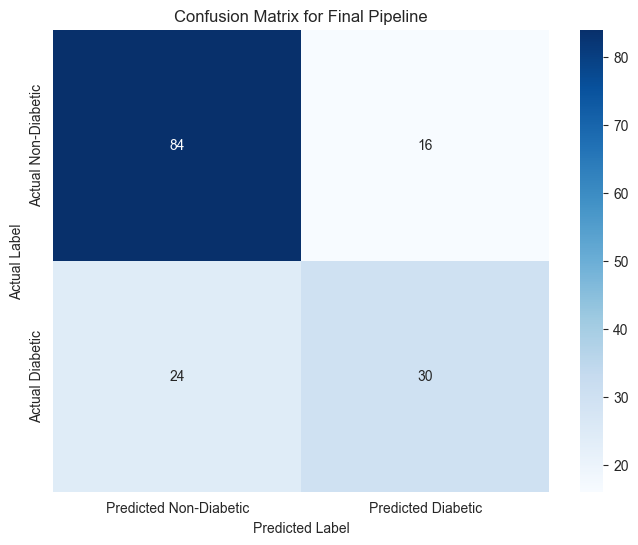



--- Sanity Check: Manual Workflow vs. Pipeline Workflow ---


KeyError: 'Diabetic (1)'

In [71]:
# Import the necessary functions for evaluation and visualization
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Make Predictions Using the Trained Pipeline ---
# We feed the RAW X_test data directly to our trained pipeline.
# The pipeline will handle all the necessary preprocessing steps internally.
# The 'y_test' variable from the previous task's code should still be in memory.
y_pred_pipeline = final_pipeline.predict(X_test)

print("--- Pipeline Predictions on Raw Test Data Generated Successfully ---")

# --- Step 2: Generate the Classification Report ---
# This report shows us the precision, recall, and f1-score for the pipeline's performance.
print("\n--- Classification Report from Pipeline ---")
print(classification_report(y_test, y_pred_pipeline, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

# --- Step 3: Generate and Visualize the Confusion Matrix ---
print("\n--- Confusion Matrix from Pipeline ---")
cm_pipeline = confusion_matrix(y_test, y_pred_pipeline)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_pipeline,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Final Pipeline')
plt.show()

# --- Step 4: The Ultimate Sanity Check ---
# Let's compare the pipeline's performance directly with the manually processed model's performance.
# We'll use the 'comparison_df' from the end of the tuning step.
print("\n\n--- Sanity Check: Manual Workflow vs. Pipeline Workflow ---")
try:
    # Get the key metrics from the pipeline's confusion matrix and report
    pipeline_f1 = classification_report(y_test, y_pred_pipeline, output_dict=True)['Diabetic (1)']['f1-score']
    pipeline_recall = classification_report(y_test, y_pred_pipeline, output_dict=True)['Diabetic (1)']['recall']
    pipeline_fn = cm_pipeline[1, 0] # False Negatives

    # Add the pipeline's results to our previous comparison dataframe
    verification_df = comparison_df.copy() # Make a copy to preserve the original
    verification_df['Pipeline Workflow'] = [pipeline_f1, pipeline_recall, pipeline_fn]
    
    display(verification_df.style.format('{:.4f}', subset=pd.IndexSlice[['F1-Score', 'Recall'], :])
                             .format('{:.0f}', subset=pd.IndexSlice[['False Negatives (Critical)'], :])
                             .background_gradient(cmap='Greens', axis=1, subset=pd.IndexSlice[['F1-Score', 'Recall'], :])
                             .highlight_min(subset=pd.IndexSlice[['False Negatives (Critical)'], :], color='lightcoral', axis=1))
    
    print("\nVerification Result: The performance metrics should be IDENTICAL between the 'Final Tuned' model and the 'Pipeline'.")
    print("This proves our pipeline correctly encapsulates the entire workflow!")

except NameError:
    print("\n'comparison_df' not found. Please ensure you have run the final task of the 'Hyperparameter Tuning' step.")


In [72]:
# We import the joblib library, which is the recommended tool for saving and loading
# scikit-learn models and pipelines due to its efficiency with large numpy arrays.
import joblib
import pandas as pd # Ensure pandas is available for creating a sample

# --- Step 1: Save the Trained Pipeline to a File ---

# Define the filename for our saved model. Using the .joblib extension is a good convention.
pipeline_filename = "diabetes_pipeline.joblib"

# Use joblib.dump() to serialize the object and save it to the specified file.
# Argument 1: The object to save (our fully trained 'final_pipeline').
# Argument 2: The path and filename to save it to.
joblib.dump(final_pipeline, pipeline_filename)

print(f"--- Pipeline Saved Successfully! ---\n")
print(f"The trained pipeline has been saved to the file: '{pipeline_filename}'")
print("This file contains the entire workflow: imputer, scaler, and the final trained model.")

# --- Step 2: Verification - Load the Pipeline and Make a Prediction ---
# This is a crucial step to confirm that our saved file is working correctly.

print("\n\n--- Verification Step ---")
print("Loading the pipeline from the file to test it...")

# Load the pipeline from the file into a new variable.
loaded_pipeline = joblib.load(pipeline_filename)

print("Pipeline loaded successfully. Preparing a sample for prediction...")

# Let's grab the first patient from our raw test set to use as a sample.
# Note: The loaded pipeline expects a DataFrame or a similar structure for prediction.
# We use X_test.iloc[[0]] to keep it as a DataFrame.
sample_patient = X_test.iloc[[0]]

# Use the loaded pipeline to make a prediction on this single sample.
# The loaded pipeline will automatically perform all the necessary preprocessing.
prediction = loaded_pipeline.predict(sample_patient)
prediction_probability = loaded_pipeline.predict_proba(sample_patient)

print("\n--- Prediction on a Sample Patient ---")
print("Sample Patient Data:")
display(sample_patient)
print(f"\nModel Prediction (0=Non-Diabetic, 1=Diabetic): {prediction[0]}")
print(f"Prediction Probabilities (for [Non-Diabetic, Diabetic]): {prediction_probability[0]}")


--- Pipeline Saved Successfully! ---

The trained pipeline has been saved to the file: 'diabetes_pipeline.joblib'
This file contains the entire workflow: imputer, scaler, and the final trained model.


--- Verification Step ---
Loading the pipeline from the file to test it...
Pipeline loaded successfully. Preparing a sample for prediction...

--- Prediction on a Sample Patient ---
Sample Patient Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159.0,64.0,NaN,NaN,27.4,0.294,40



Model Prediction (0=Non-Diabetic, 1=Diabetic): 1
Prediction Probabilities (for [Non-Diabetic, Diabetic]): [0.23461181 0.76538819]


In [73]:
!pip install Flask

  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
Using cached click-8.3.0-py3-none-any.whl (107 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)

   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   -------- ------------------------------- 1/5 [itsdangerous]
   ---------------- ----------------------- 2/5 [click]
   ---------------- ----------------------- 2/5 [click]
   -------------------------------- ------- 4/5 [Flask]
   -------------------------------- ------- 4/5 [Flask]
   ---------------------------------------- 5/5 [Flask]



In [74]:
# --- Import Core Libraries ---

# Import the main Flask class. This class is the blueprint for our web application.
# We will create an 'instance' of this class to build our app.
from flask import Flask

# Import the joblib library. This is the tool we will use to load our saved
# machine learning pipeline model from its file.
import joblib

# --- (The rest of our application code will go here) ---

print("Flask and joblib have been successfully imported.")

Flask and joblib have been successfully imported.


In [75]:
pip install flask-cors

Note: you may need to restart the kernel to use updated packages.
